# Assignment 2


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from graphviz import Digraph
import numpy as np
import pandas as pd
import copy as cp
from collections import OrderedDict as odict
from itertools import product, combinations
from tabulate import tabulate

In [2]:
from assigment2 import GraphicalModel

## Representation

### 1. Insert and remove nodes.

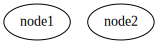

In [3]:
g = GraphicalModel()
g.insert('node1', ('yes', 'no'))
g.insert('node2', ('yes', 'no'))

g.showGraph()

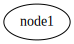

In [4]:
g.remove('node2')
g.showGraph()

### 2. Connect and disconnect nodes with edges.

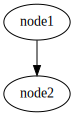

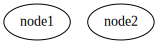

In [5]:
g.insert('node2', ('yes', 'no'))
g.connect('node1', 'node2')
g.showGraph()
g.disconnect('node1', 'node2')
g.showGraph()

### 3. Specify probabilities for a node.

In [6]:
g.connect('node1', 'node2')
g.factorize('node1', [0.1, 0.9])
print(g.factors)
print('node1:')
g.printFactor('node1')
g.factorize('node2', [0.5, 0.5, 0.3, 0.7], ['node1'])
print('node2:')
g.printFactor('node2')

{'node1': {'dom': ('node1',), 'table': OrderedDict([(('yes',), 0.1), (('no',), 0.9)])}}
node1:
| node1   |   Pr |
|---------+------|
| yes     |  0.1 |
| no      |  0.9 |
node2:
| node1   | node2   |   Pr |
|---------+---------+------|
| yes     | yes     |  0.5 |
| yes     | no      |  0.5 |
| no      | yes     |  0.3 |
| no      | no      |  0.7 |


### 4. Save Bayesian network to a file.

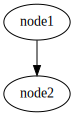

In [7]:
g.save('save_test.net')
g.load('save_test.net')
g.showGraph()

### 5. Load from .net file.

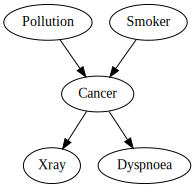

In [8]:
g = GraphicalModel()
g.load('small/cancer.net')
g.showGraph()
# g.printFactor('lung')

## Pruning and pre-processing techniques for inference

The point of prunning is to find the smallest subgraph of a Bayesian Network that will correctly compute the conditional distribution of a subset of variables in it.

### 1. Network pruning techniques based on query structure.
Suppose our query is P(Q|K), we can prune the network by removing all nodes that are d-seperated from Q by K, and than recursively prune the leaf node that is not in Q $\cup$ K

In [9]:
# pruned_graph = g.prune(['either'], lung='yes')
# pruned_graph.showGraph()
# pruned_graph.printFactor('either')

### 2. Min-fill heuristic for variable order elimination. 

   Deterministic and stochastic composition of min-fill heuristic with min-degree heuristic.
   
   We decide to use **min-fill to select node** and **broke ties stochastically**.

**1. moralize the graph**

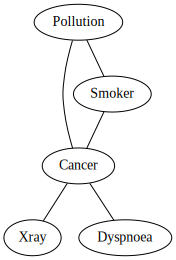

In [10]:
g.show_moral_graph()

**2. eliminate variables based on the Min-fill heuristic.**

Choose the node with smallest fill

In [11]:
ve_order = g.get_ve_order()
ve_order

['Xray', 'Dyspnoea', 'Smoker', 'Cancer', 'Pollution']

## Exact inference

1. A representation for the jointree that can be specified by the user
2. A function that converts an elimination order into a jointree


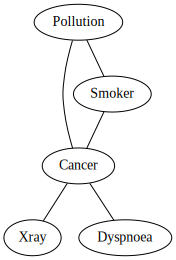

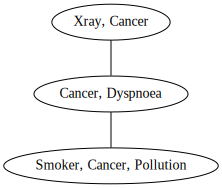

In [12]:
moral_graph = g.moralize()
g.show_moral_graph()
jointree = moral_graph.build_jointree(ve_order)
moral_graph.show_jointree(jointree)

## Approximate inference

### Gibbs sampling
#### 1. A function that let the user specify the number of chains.
    
   See as `burn_in()` in the class.

In [13]:
chains = g.burn_in(chain_num=5)
for chain in chains:
    print(chain.node_value)

{'Pollution': 'low', 'Smoker': 'True', 'Cancer': 'False', 'Xray': 'positive', 'Dyspnoea': 'True'}
{'Pollution': 'low', 'Smoker': 'True', 'Cancer': 'True', 'Xray': 'positive', 'Dyspnoea': 'True'}
{'Pollution': 'low', 'Smoker': 'False', 'Cancer': 'False', 'Xray': 'negative', 'Dyspnoea': 'False'}
{'Pollution': 'low', 'Smoker': 'False', 'Cancer': 'False', 'Xray': 'negative', 'Dyspnoea': 'False'}
{'Pollution': 'low', 'Smoker': 'False', 'Cancer': 'False', 'Xray': 'negative', 'Dyspnoea': 'False'}


#### 2. A function to mix up chains until convergence.

   See as `burn_in()` in the class. The output of this function are already mixed up chains.
    
    

#### 3. A function that samples the chains for a specified number of samples.

   See as `gibbs_sampling()` in the class.

In [14]:
samples = g.gibbs_sampling(sample_num=1000, chain_num=3, q_vars=['xray'], either='yes', smoke='yes')

AssertionError: 

In [ ]:
samplesdf = pd.DataFrame(samples)
samplesdf.describe()

#### 4. A function to answer queries based on the samples.

   See as `answer_from_samples()` in the class.

In [ ]:
answer = g.answer_from_samples(samples)
answer

In [ ]:
g.printFactor('xray')

Compared to the CPT, the sampling answer is quite accurate.